In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#To turn off warning messages.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset 
data = pd.read_csv("Churn_Modelling.csv")  
data.head()  

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.shape

(10000, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [6]:
#EDA
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

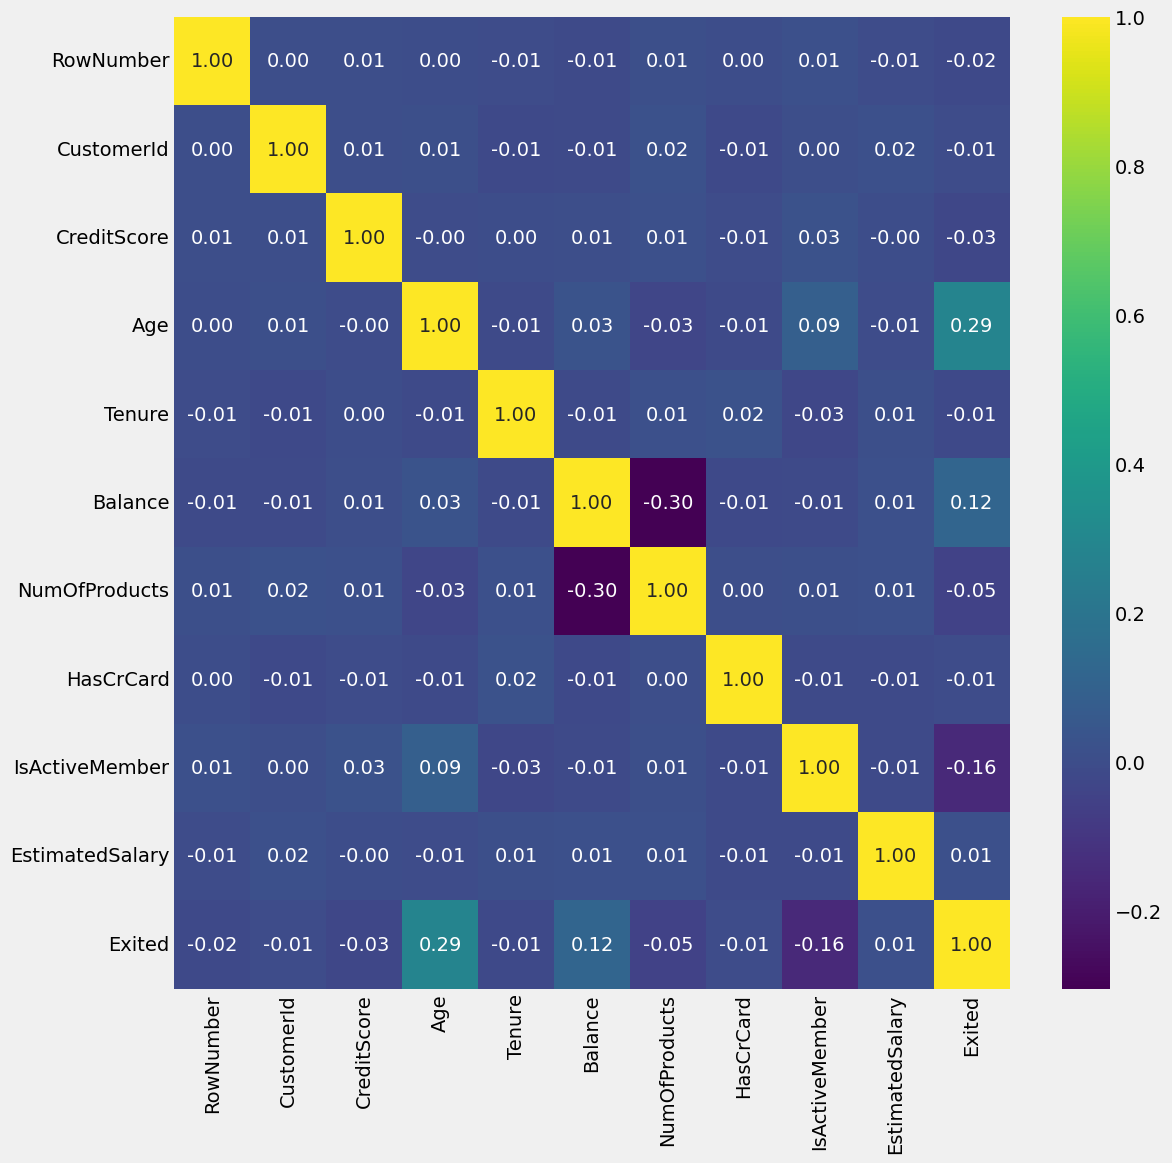

In [7]:
#Colerration check.
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(),annot=True,fmt = ".2f",cmap='viridis')
plt.show()

In [8]:
#Clculate age
minAge=min(data.Age)
maxAge=max(data.Age)
meanAge=data.Age.mean()
print("min =",minAge ,"max =", maxAge , "mean =",meanAge)

min = 18 max = 92 mean = 38.9218


In [9]:
#Prepare ages for a bie chart
Young = data[(data.Age>=18)&(data.Age<28)]
Middle = data[(data.Age>=28)&(data.Age<39)]
Old = data[(data.Age>39)]

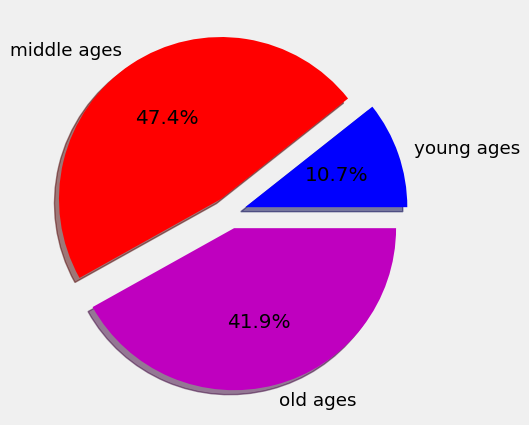

In [10]:
plt.style.use('fivethirtyeight')
colors = ['b','r','m']
explode = [0.1,0.1,0.1]
plt.figure(figsize=(5,5))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Old)],labels=['young ages','middle ages','old ages'],explode=explode,shadow=True,colors=colors, autopct='%1.1f%%')
plt.show()

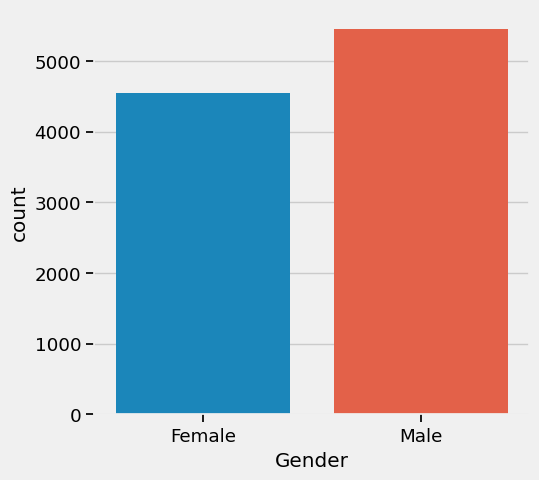

In [11]:
#Gender 
plt.figure(figsize=(5,5))
sns.countplot(x='Gender', data=data)
plt.show()

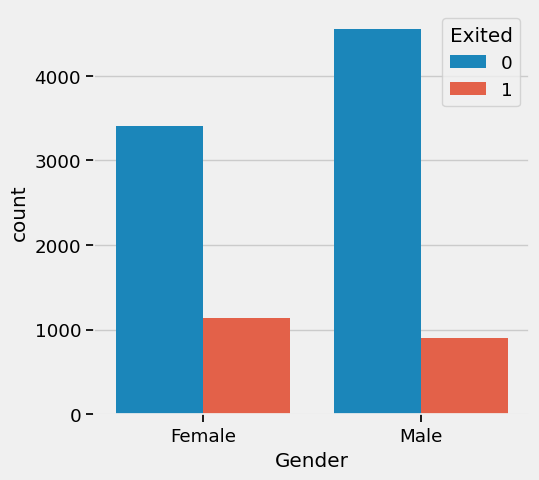

In [12]:
#Gender 
plt.figure(figsize=(5,5))
sns.countplot(x='Gender', data=data,hue='Exited')
plt.show()

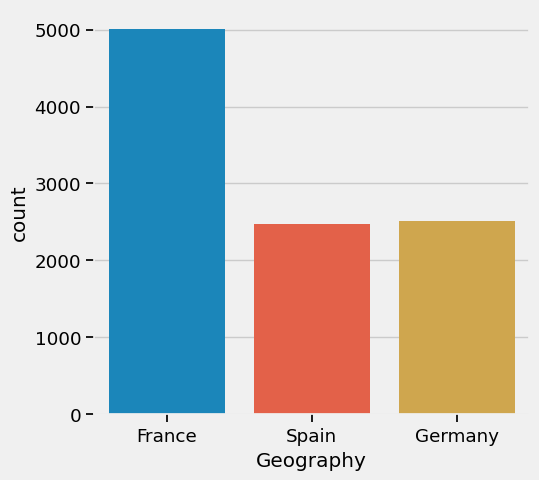

In [14]:
#Gender 
plt.figure(figsize=(5,5))
sns.countplot(x='Geography', data=data)
plt.show()

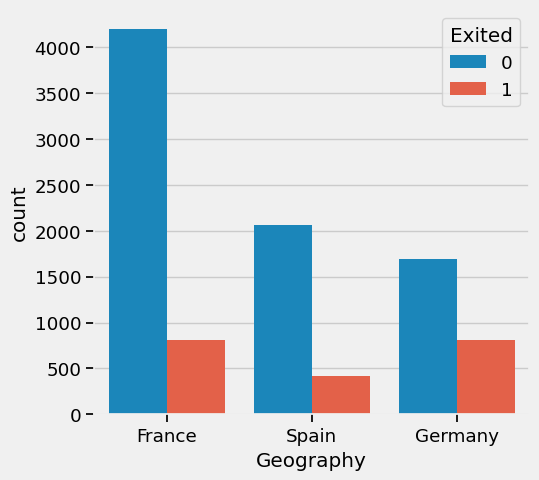

In [15]:
#Gender 
plt.figure(figsize=(5,5))
sns.countplot(x='Geography', data=data,hue='Exited')
plt.show()

In [16]:
data = data.drop(["RowNumber","CustomerId","Surname"], axis = 1)  

In [17]:
#Convert str to int 
data = pd.get_dummies(data)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [18]:
X = data.drop(["Exited"], axis = 1)  
y = data["Exited"]  

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [20]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
#Training models.
models = [
           KNeighborsClassifier(n_neighbors = 10)
           ,RandomForestClassifier(criterion = 'entropy' , max_depth = 10 , n_estimators = 100) 
           ,SVC(kernel = 'rbf' ,C = 1)
         ]
for i in range(3):
    models[i].fit(X_train, y_train)

In [30]:
#Predict and show the Accuracy & Confutin matrix
for i in range (3):
    y_pred = models[i].predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print("Confution matrix for model " f'{models[i]} : \n',cm)
    ac = accuracy_score(y_test, y_pred)
    print("Accuracy score for model " f'{models[i]} : ',ac)
    cr = classification_report(y_test, y_pred)
    print("classification_report for model " f'{models[i]} : \n',cr) 

Confution matrix for model KNeighborsClassifier(n_neighbors=10) : 
 [[1923   68]
 [ 340  169]]
Accuracy score for model KNeighborsClassifier(n_neighbors=10) :  0.8368
classification_report for model KNeighborsClassifier(n_neighbors=10) : 
               precision    recall  f1-score   support

           0       0.85      0.97      0.90      1991
           1       0.71      0.33      0.45       509

    accuracy                           0.84      2500
   macro avg       0.78      0.65      0.68      2500
weighted avg       0.82      0.84      0.81      2500

Confution matrix for model RandomForestClassifier(criterion='entropy', max_depth=10) : 
 [[1936   55]
 [ 271  238]]
Accuracy score for model RandomForestClassifier(criterion='entropy', max_depth=10) :  0.8696
classification_report for model RandomForestClassifier(criterion='entropy', max_depth=10) : 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1991
           1       0.

In [33]:
#Use Ramdomforest (best accuracy score) for creating a prediction column 
y_pred = models[1].predict(X_test)